# Shopify 

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

## Question A: Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [1]:
import numpy as np # Linear Algebra
import pandas as pd # Data Processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [3]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

I'm guessing that the AOV value of 3145.13 probably came from the **mean** as high values of order amounts will drag this number up. Also, there is an incredibly large standard deviation of 41282.54. This means that on an average, the values vary 41,282.54 from the mean, making the mean not a very useful representation of the AOV.

Also, we can see that the minimum value is 90 and max value is 704000. Comparing these numbers, we can see that the maximum value is much higher than the other values. Considering our dataset has 5000 records, there are probably a few outliers that are incredibly high, ultimately dragging up the mean.

To get a sense of the distribution, we can look at a box plot and histogram of the data.

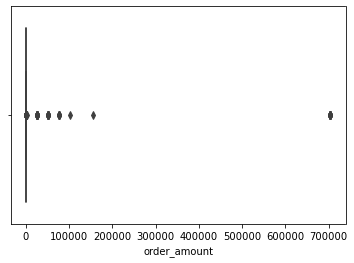

In [4]:
sns.boxplot(x='order_amount',
            data=df)
plt.show()

C:\Users\sukes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


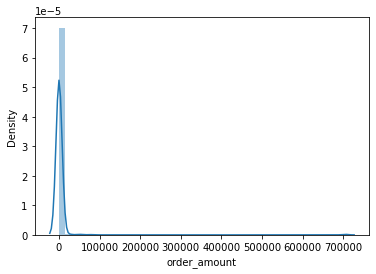

In [11]:
sns.distplot(df.order_amount)
plt.show()

The entire histogram and box portion of the box plot is a line along 0. This proves that there are lots of outliers. Let's try finding them by grouping the data by order amount, counting the number of entries for each group, and sort it in descending order.

In [6]:
unique_amounts = df.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
unique_amounts.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


Interesting. It looks like some of these high order amounts are repeated, especially 704000, 51450, and 25725. Let's look at these rows from our original dataset.

In [7]:
df.loc[df['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00


It appears that the order amounts of 704000 occur at the same time each day between the same store and users. The data for order amounts of 51450 and 25725 similar. It seems as though orders of 51450 are just transactions that bought two items worth 25725 as they all come from the same store id 78.

For the 704000 amounts, it seems like the transactions are probably some sort of supplier purchasing many shoes at once since the order amount is consistently 2000.

To better evaluate this data, we can clean some of the values. Let's try plotting only values that are the median +/- 1.5 times the interquartile range.

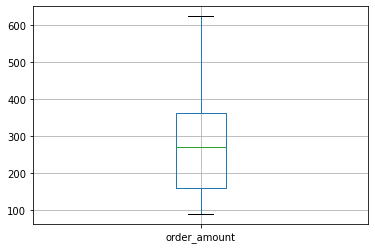

In [10]:
q1 = df.order_amount.quantile(q=0.25)
q2 = df.order_amount.quantile(q=0.5)
q3 = df.order_amount.quantile(q=0.75)
IQR = q3 - q1

df_truncated = df[(df.order_amount < q2 + IQR * 1.5) & (df.order_amount > q2 - IQR * 1.5)]
df_truncated.boxplot(column='order_amount')
plt.show()

## Question B:  What metric would you report for this dataset?

Looking at the box plot for df_truncated, it looks like the distribution is skewed towards lower values. With this in mind, I would report the **median value of the truncated dataset**. The values above the median will increase the mean in a disproportionate amount.

## Question C: What is its value?

We can find this value using the describe() function to find that it is **$272**. It also shows that the standard deviation is 132.06, a much more reasonable result!

In [20]:
df_truncated.order_amount.describe()


count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64